<a href="https://colab.research.google.com/github/Gauranga2022/Time-Series-analysis/blob/main/Stock_Price_Volatility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Packages

In [5]:
pip install arch

In [6]:
from random import gauss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Reading the files

In [7]:
df1 = pd.read_csv("/content/NIFTY50.NS.csv")
df2 = pd.read_csv("/content/NSEBANK.NS.csv")
df3 = pd.read_csv("/content/RELIANCE.NS.csv")
df4 = pd.read_csv("/content/TCS.NS.csv")

In [8]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0
...,...,...,...,...,...,...,...
3998,2023-11-24,19809.599609,19832.849609,19768.849609,19794.699219,19794.699219,145900.0
3999,2023-11-28,19844.650391,19916.849609,19800.000000,19889.699219,19889.699219,229600.0
4000,2023-11-29,19976.550781,20104.650391,19956.300781,20096.599609,20096.599609,236200.0
4001,2023-11-30,20108.500000,20158.699219,20015.849609,20133.150391,20133.150391,486600.0


In [9]:
df1.shape, df2.shape, df3.shape, df4.shape, df1 == df2

((4003, 7),
 (4003, 7),
 (7026, 7),
 (5301, 7),
       Date   Open   High    Low  Close  Adj Close  Volume
 0     True  False  False  False  False      False    True
 1     True  False  False  False  False      False    True
 2     True  False  False  False  False      False    True
 3     True  False  False  False  False      False    True
 4     True  False  False  False  False      False    True
 ...    ...    ...    ...    ...    ...        ...     ...
 3998  True  False  False  False  False      False   False
 3999  True  False  False  False  False      False   False
 4000  True  False  False  False  False      False   False
 4001  True  False  False  False  False      False   False
 4002  True  False  False  False  False      False   False
 
 [4003 rows x 7 columns])

In [10]:
df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
df1[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = df1[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(df1.mean())
df2[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = df2[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(df2.mean())
df3[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = df3[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(df3.mean())
df4[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = df4[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(df4.mean())

<ipython-input-11-e86c2ef3d0be>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = df1[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(df1.mean())
<ipython-input-11-e86c2ef3d0be>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = df2[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(df2.mean())
<ipython-input-11-e86c2ef3d0be>:3: FutureWarning: The default value of numeric_only in D

In [12]:
df1.info(), df2.info(), df3.info(), df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4003 non-null   object 
 1   Open       4003 non-null   float64
 2   High       4003 non-null   float64
 3   Low        4003 non-null   float64
 4   Close      4003 non-null   float64
 5   Adj Close  4003 non-null   float64
 6   Volume     4003 non-null   float64
dtypes: float64(6), object(1)
memory usage: 219.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4003 non-null   object 
 1   Open       4003 non-null   float64
 2   High       4003 non-null   float64
 3   Low        4003 non-null   float64
 4   Close      4003 non-null   float64
 5   Adj Close  4003 non-null   float64
 6   Volume     4003 non-null   float64
dtypes: float6

(None, None, None, None)

In [13]:
df1['Close'].isna().sum(), df2['Close'].isna().sum(), df3['Close'].isna().sum(), df4['Close'].isna().sum()

(0, 0, 0, 0)

### Finding the Log returns

In [14]:
dic = {}
for i in range(4):
  dic[i+1] = []
dic

{1: [], 2: [], 3: [], 4: []}

In [15]:
for i in range(4003):
  dic[1].append(df1['Close'][i])
for i in range(4003):
  dic[2].append(df2['Close'][i])
for i in range(7026):
  dic[3].append(df3['Close'][i])
for i in range(5301):
  dic[4].append(df4['Close'][i])
dic[1][2:10], dic[2][2:10], dic[3][2:10], dic[4][2:10]

([4732.350098,
  4747.549805,
  4837.549805,
  4932.200195,
  4938.850098,
  4940.5,
  5000.549805,
  5021.350098],
 [7401.850098,
  7390.149902,
  7464.5,
  7650.899902,
  7629.149902,
  7755.899902,
  7833.649902,
  8042.200195],
 [15.913584,
  15.766594,
  15.658285,
  15.031645,
  14.598411,
  14.2232,
  14.668038,
  14.513312],
 [36.462502,
  36.462502,
  36.375,
  35.474998,
  36.462502,
  38.25,
  39.900002,
  42.299999])

In [16]:
log_ret = {}
for i in range(4):
  log_ret[i+1] = [0]
log_ret

{1: [0], 2: [0], 3: [0], 4: [0]}

In [17]:
for j in log_ret.keys():
  for i in range(1,len(dic[j])):
    log_ret[j].append(np.log(dic[j][i-1]/dic[j][i]))
len(log_ret.keys()), [len(log_ret[j]) for j in range(1,5)]

(4, [4003, 4003, 7026, 5301])

### Plots of log returns

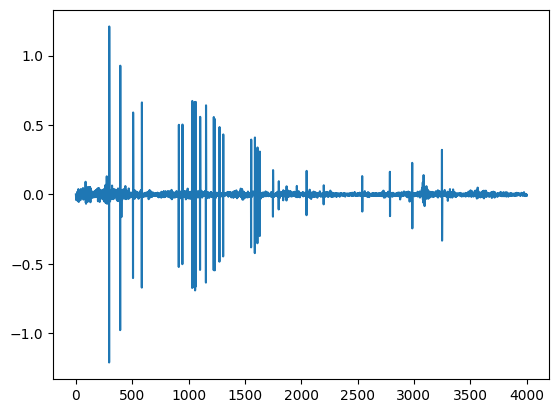

In [18]:
plt.plot(log_ret[1])

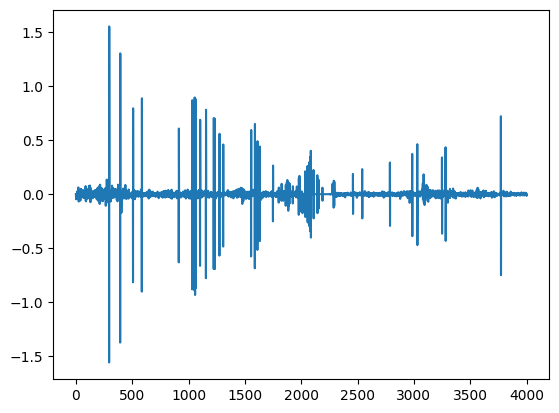

In [19]:
plt.plot(log_ret[2])

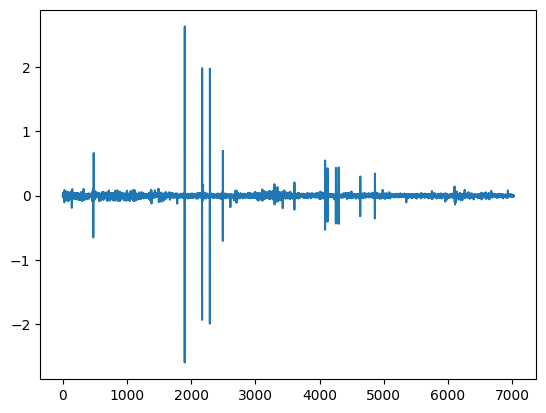

In [20]:
plt.plot(log_ret[3])

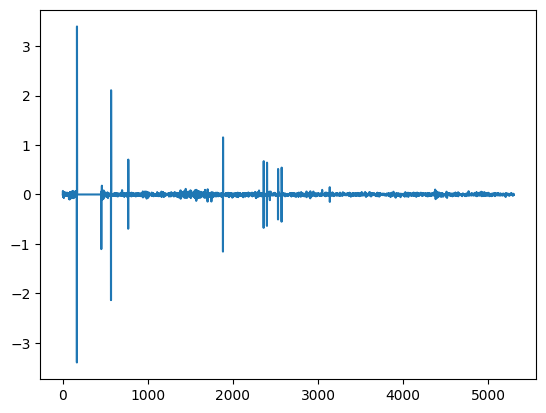

In [21]:
plt.plot(log_ret[4])

## GARCH(p=2,q=2) Model; Have used different values of (p,q)

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
volatility = \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
= \frac{a_t}{ɛ_t}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$



### Volatility dictionary of lists and plots of volatility

In [22]:
n1,n2,n3,n4 = len(log_ret[1]), len(log_ret[2]), len(log_ret[3]), len(log_ret[4])

vols = {}
for i in range(1,5):
  vols[i] = []

for i in range(n1):
    new_vol = (1/gauss(0,1))*log_ret[1][i]
    vols[1].append(new_vol)

for i in range(n2):
    new_vol = (1/gauss(0,1))*log_ret[2][i]
    vols[2].append(new_vol)

for i in range(n3):
    new_vol = (1/gauss(0,1))*log_ret[3][i]
    vols[3].append(new_vol)

for i in range(n4):
    new_vol = (1/gauss(0,1))*log_ret[4][i]
    vols[4].append(new_vol)


(-1.0, 1.0)

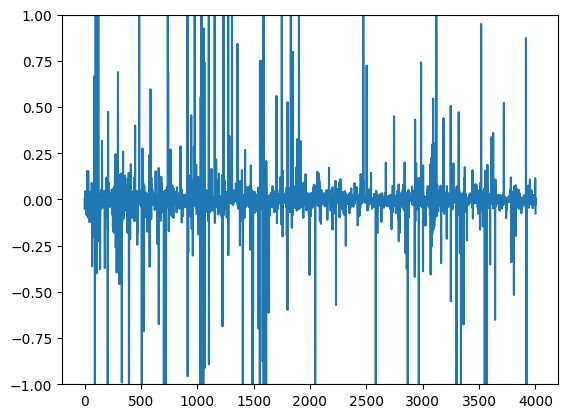

In [23]:
plt.plot(vols[1])
plt.ylim(-1, 1)

(-1.0, 1.0)

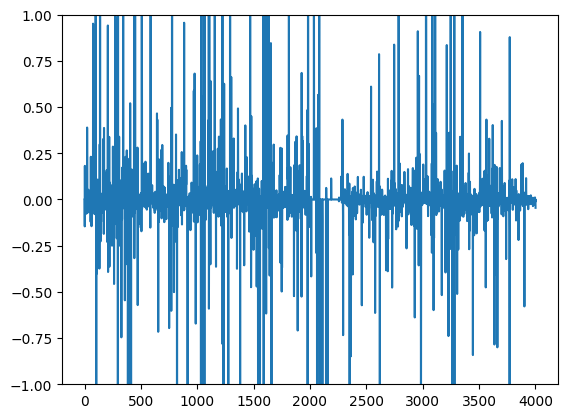

In [24]:
plt.plot(vols[2])
plt.ylim(-1,1)

(-1.0, 1.0)

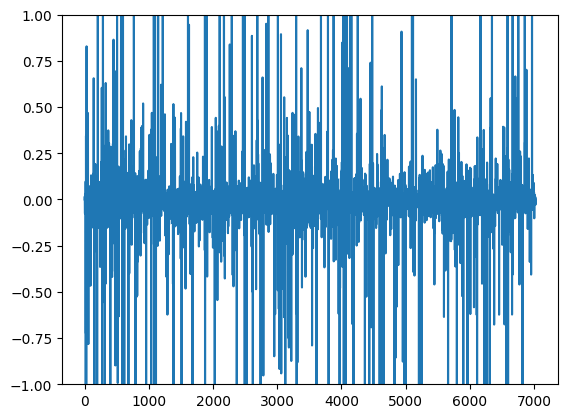

In [25]:
plt.plot(vols[3])
plt.ylim(-1,1)

(-1.0, 1.0)

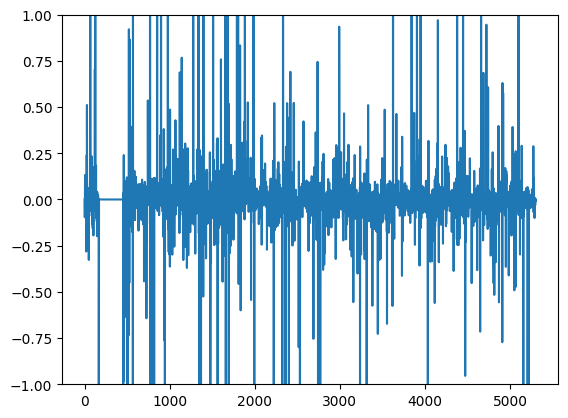

In [26]:
plt.plot(vols[4])
plt.ylim(-1, 1)

### PACF plots

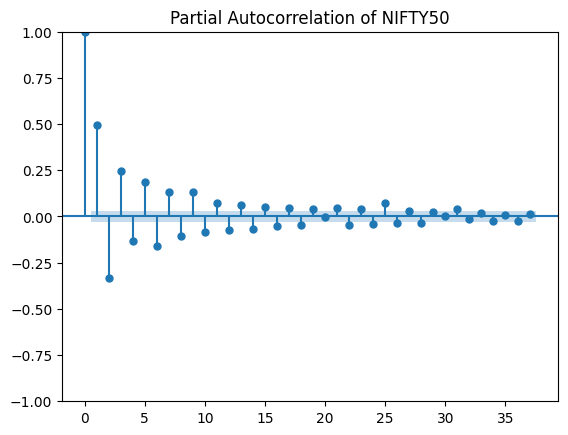

In [27]:
plot_pacf(np.array(log_ret[1])**2)
plt.title("Partial Autocorrelation of NIFTY50")
plt.show()

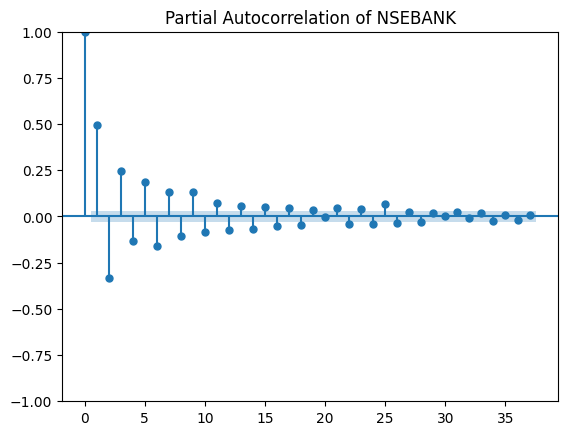

In [28]:
plot_pacf(np.array(log_ret[2])**2)
plt.title("Partial Autocorrelation of NSEBANK")
plt.show()

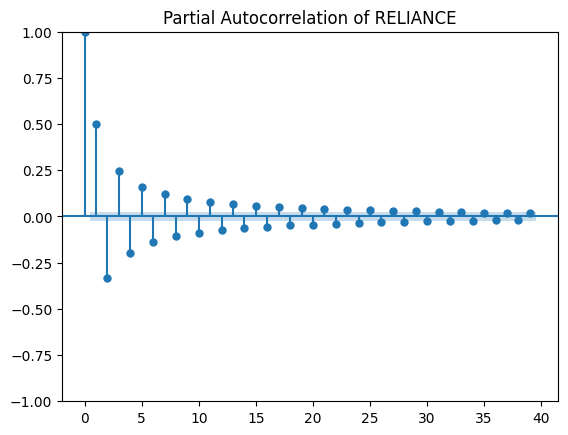

In [29]:
plot_pacf(np.array(log_ret[3])**2)
plt.title("Partial Autocorrelation of RELIANCE")
plt.show()

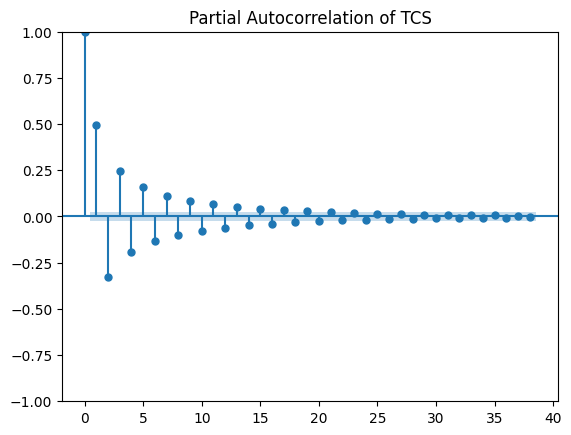

In [30]:
plot_pacf(np.array(log_ret[4])**2)
plt.title("Partial Autocorrelation of TCS")
plt.show()

### Fit the GARCH model

NIFTY50


In [31]:
test_size = int(0.60*len(log_ret[1]))
train, test = log_ret[1][:-test_size], log_ret[1][-test_size:]
model = arch_model(train, p=1, q=1)
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 15030717.304357268
Iteration:      2,   Func. Count:     16,   Neg. LLF: -1872.6880190912816
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1872.688025075871
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.009707. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [32]:
model_fit.summary

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1872.69
Distribution:                  Normal   AIC:                          -3737.38
Method:            Maximum Likelihood   BIC:                          -3715.86
                                        No. Observations:                 1602
Date:                Thu, Dec 07 2023   Df Residuals:                     1601
Time:                        12:59:08   Df Model:                            1
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu      

In [33]:
predictions = model_fit.forecast(horizon=test_size)

Volatility Prediction

(-1.5, 1.5)

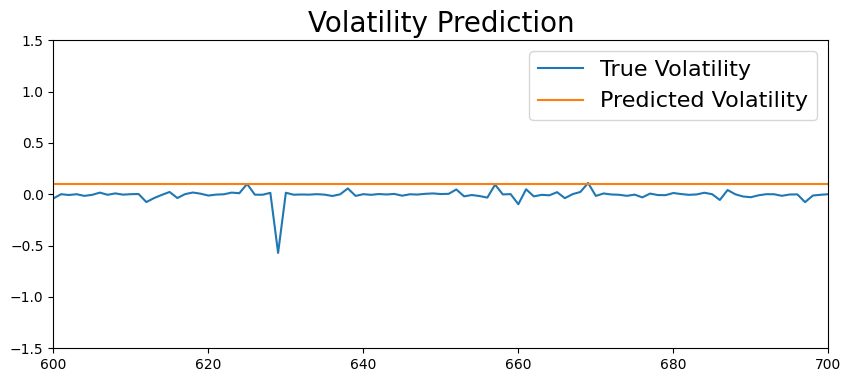

In [34]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[1][-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
plt.xlim(600,700)
plt.ylim(-1.5,1.5)

Long Term Volatility Prediction

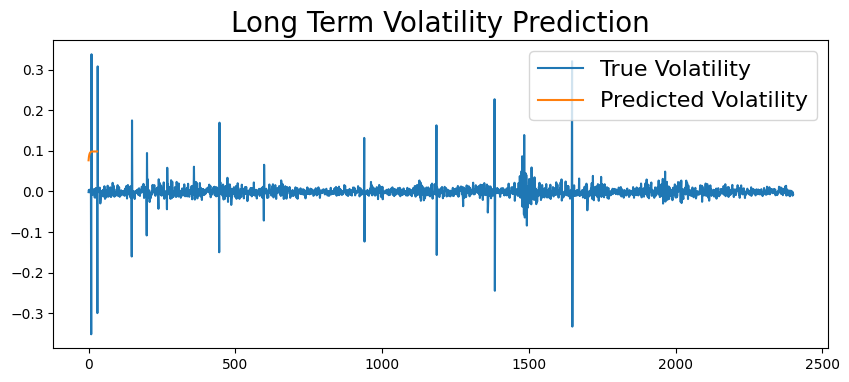

In [35]:
predictions_long_term = model_fit.forecast(horizon=30)
plt.figure(figsize=(10,4))
true, = plt.plot(log_ret[1][-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

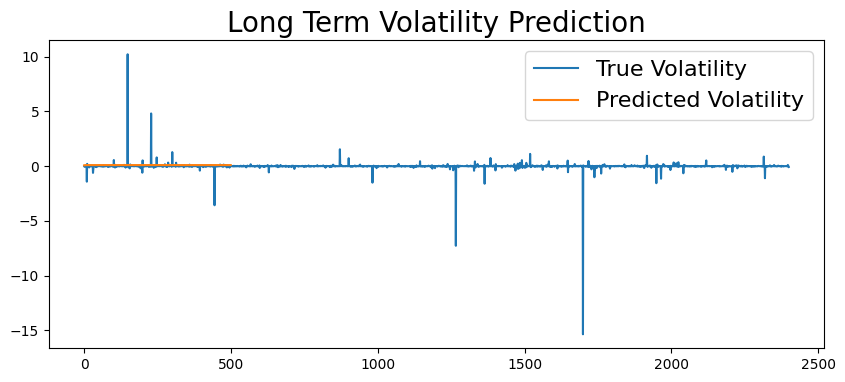

In [36]:
predictions_long_term = model_fit.forecast(horizon=500)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[1][-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

Rolling Forecast

In [37]:
rolling_predictions = []
for i in range(test_size):
    train = log_ret[1][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004857. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004855. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-pack

(-1.5, 1.5)

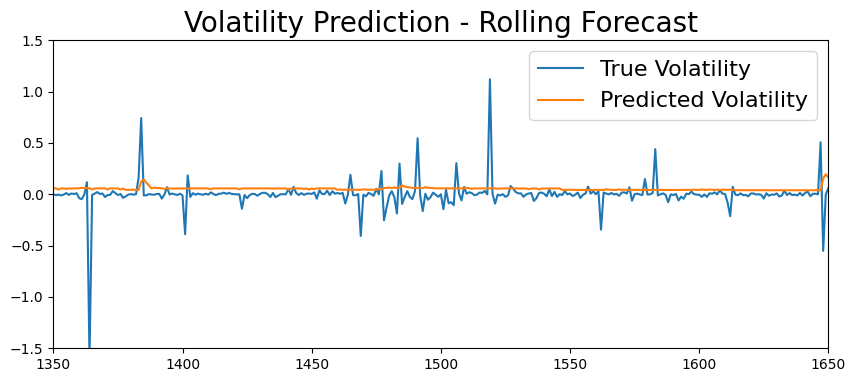

In [38]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[1][-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
plt.xlim(1350,1650)
plt.ylim(-1.5,1.5)

NSEBANK


In [39]:
test_size = int(0.60*len(log_ret[2]))
train, test = log_ret[2][:-test_size], log_ret[2][-test_size:]
model = arch_model(train, p=1, q=1)
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 575888955.4377999
Iteration:      2,   Func. Count:     17,   Neg. LLF: -756.3829110617037
Iteration:      3,   Func. Count:     23,   Neg. LLF: -1492.1374955038089
Iteration:      4,   Func. Count:     30,   Neg. LLF: -1302.4440218434734
Iteration:      5,   Func. Count:     36,   Neg. LLF: 14184.115849426686
Iteration:      6,   Func. Count:     43,   Neg. LLF: -1524.7670763497167
Iteration:      7,   Func. Count:     48,   Neg. LLF: -1525.3608950275604
Iteration:      8,   Func. Count:     53,   Neg. LLF: -1525.511733509375
Iteration:      9,   Func. Count:     58,   Neg. LLF: -1525.5127697400376
Iteration:     10,   Func. Count:     63,   Neg. LLF: -1525.5128984970415
Iteration:     11,   Func. Count:     68,   Neg. LLF: -1525.5129022256297
Iteration:     12,   Func. Count:     72,   Neg. LLF: -1525.5129028315919
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1525.5129022256297
       

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01617. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [40]:
model_fit.summary

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1525.51
Distribution:                  Normal   AIC:                          -3043.03
Method:            Maximum Likelihood   BIC:                          -3021.51
                                        No. Observations:                 1602
Date:                Thu, Dec 07 2023   Df Residuals:                     1601
Time:                        13:00:59   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         

In [41]:
predictions = model_fit.forecast(horizon=test_size)

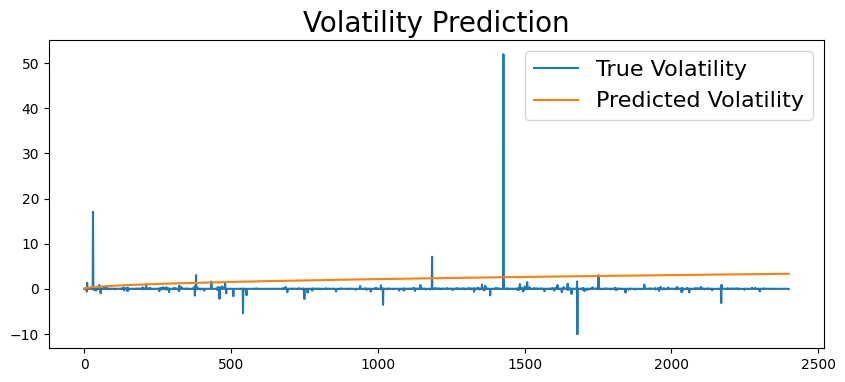

In [42]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[2][-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
# plt.xlim(600,700)
# plt.ylim(-1.5,1.5)

In [43]:
rolling_predictions = []
for i in range(test_size):
    train = log_ret[2][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

Streaming output truncated to the last 5000 lines.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.008935. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.008932. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by ei

(-1.5, 1.5)

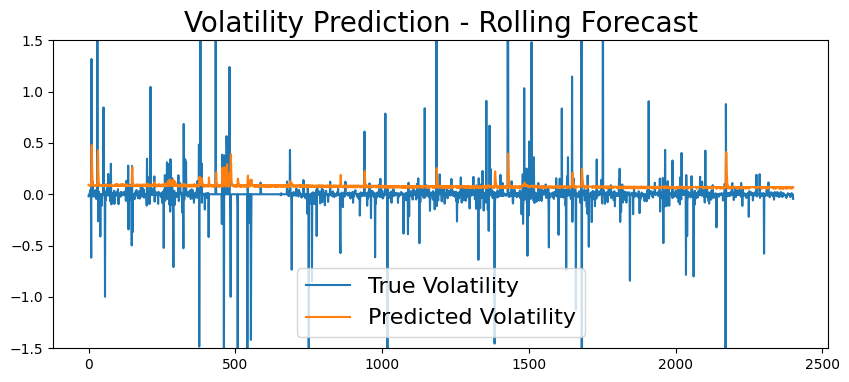

In [44]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[2][-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
#plt.xlim(1350,1650)
plt.ylim(-1.5,1.5)

RELIANCE

In [45]:
test_size = int(0.60*len(log_ret[3]))
train, test = log_ret[3][:-test_size], log_ret[3][-test_size:]
model = arch_model(train, p=1, q=0)
model_fit = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 5533277.3729049675
Iteration:      2,   Func. Count:     15,   Neg. LLF: -345.8289835886858
Iteration:      3,   Func. Count:     22,   Neg. LLF: -3117.302315116328
Iteration:      4,   Func. Count:     28,   Neg. LLF: -2848.114268124483
Iteration:      5,   Func. Count:     34,   Neg. LLF: -3122.4264266440596
Iteration:      6,   Func. Count:     38,   Neg. LLF: -3122.4349361801355
Iteration:      7,   Func. Count:     42,   Neg. LLF: -3122.4362124274667
Iteration:      8,   Func. Count:     46,   Neg. LLF: -3122.4362226691806
Iteration:      9,   Func. Count:     49,   Neg. LLF: -3122.436222669154
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3122.4362226691806
            Iterations: 9
            Function evaluations: 49
            Gradient evaluations: 9


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01162. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [46]:
model_fit.summary

<bound method ARCHModelResult.summary of                       Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                3122.44
Distribution:                  Normal   AIC:                          -6238.87
Method:            Maximum Likelihood   BIC:                          -6221.05
                                        No. Observations:                 2811
Date:                Thu, Dec 07 2023   Df Residuals:                     2810
Time:                        13:02:37   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         

In [47]:
predictions = model_fit.forecast(horizon=test_size)

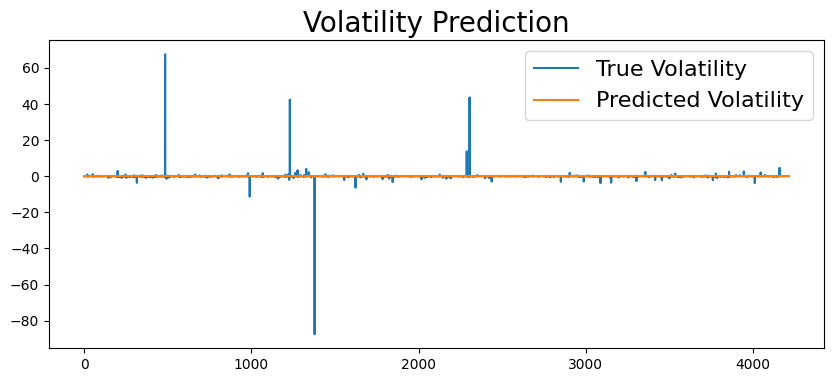

In [48]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[3][-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
# plt.xlim(600,700)
# plt.ylim(-1.5,1.5)

In [49]:
rolling_predictions = []
for i in range(test_size):
    train = log_ret[3][:-(test_size-i)]
    model = arch_model(train, p=1, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

Streaming output truncated to the last 5000 lines.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.005638. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.005637. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by ei

(-1.5, 1.5)

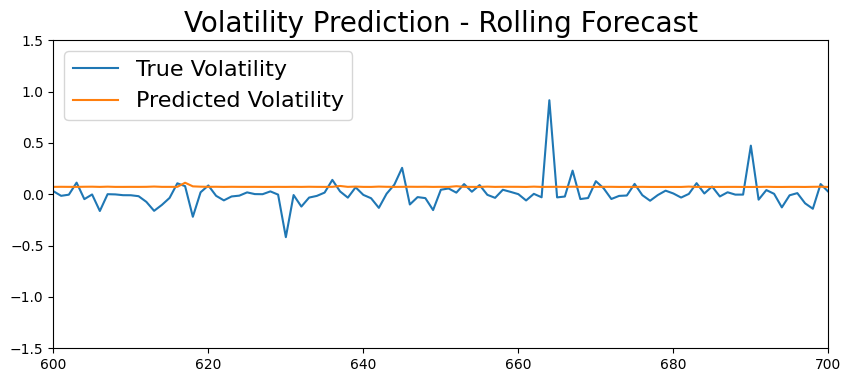

In [50]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[3][-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
plt.xlim(600,700)
plt.ylim(-1.5,1.5)

TCS

In [51]:
test_size = int(0.60*len(log_ret[4]))
train, test = log_ret[4][:-test_size], log_ret[4][-test_size:]
model = arch_model(train, p=1, q=0)
model_fit = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 30191002.50477334
Iteration:      2,   Func. Count:     16,   Neg. LLF: 420659.1116627641
Iteration:      3,   Func. Count:     21,   Neg. LLF: -2039.5878937950492
Iteration:      4,   Func. Count:     25,   Neg. LLF: -2067.9531834793315
Iteration:      5,   Func. Count:     29,   Neg. LLF: -2071.022372526165
Iteration:      6,   Func. Count:     33,   Neg. LLF: -2073.6053111337164
Iteration:      7,   Func. Count:     37,   Neg. LLF: -2073.763824794655
Iteration:      8,   Func. Count:     41,   Neg. LLF: 18534.28749520739
Iteration:      9,   Func. Count:     51,   Neg. LLF: 1391.188450147635
Iteration:     10,   Func. Count:     59,   Neg. LLF: -2073.7883642299444
Iteration:     11,   Func. Count:     62,   Neg. LLF: -2073.7883612651367
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2073.7883642299444
            Iterations: 12
            Function evaluations: 62
            Gradient e

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01798. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [52]:
model_fit.summary

<bound method ARCHModelResult.summary of                       Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                2073.79
Distribution:                  Normal   AIC:                          -4141.58
Method:            Maximum Likelihood   BIC:                          -4124.60
                                        No. Observations:                 2121
Date:                Thu, Dec 07 2023   Df Residuals:                     2120
Time:                        13:06:12   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0232  

In [53]:
predictions = model_fit.forecast(horizon=test_size)

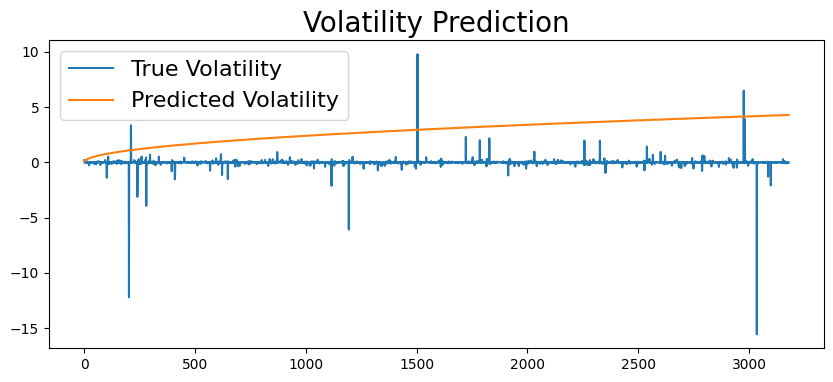

In [54]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[4][-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
# plt.xlim(600,700)
# plt.ylim(-1.5,1.5)

In [55]:
rolling_predictions = []
for i in range(test_size):
    train = log_ret[4][:-(test_size-i)]
    model = arch_model(train, p=1, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

Streaming output truncated to the last 5000 lines.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.008791. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.008789. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by ei

(-1.5, 1.5)

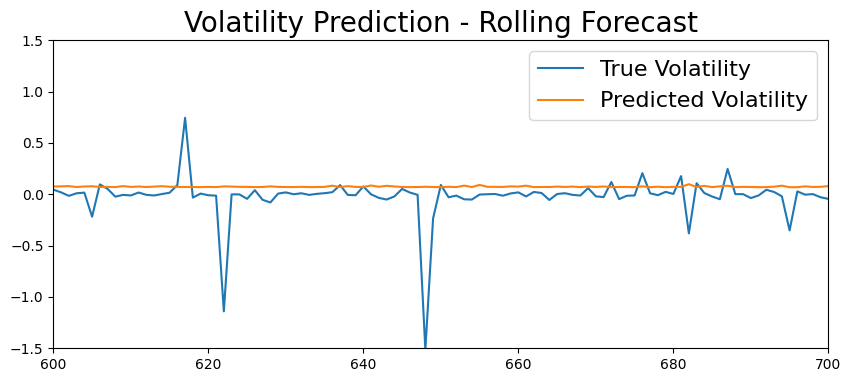

In [56]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[4][-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
plt.xlim(600,700)
plt.ylim(-1.5,1.5)